In [1]:
#Loading necessary libraries for the project
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.metrics import accuracy_score

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Loading the dataset
data = pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Documents\\Semester 8\\IoT Domain Analyst\\Project\\Sleep_health_and_lifestyle_dataset.csv")
data


,Person_ID,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Blood_Pressure,Heart_Rate,Daily_Steps,SPO2_Rate,Snoring,Sleep_Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,95,Yes,Normal
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,96,Yes,Normal
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,98,No,Normal
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,75,No,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,80,Yes,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,87,7000,89,Yes,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,85,7000,87,Yes,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,71,7000,88,Yes,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,70,7000,88,Yes,Sleep Apnea


In [3]:
#Removing all the NaN values
data.dropna(inplace=True)
print(data)

     Person_ID  Gender  Age            Occupation  Sleep_Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality_of_Sleep  Physical_Activity_Level  Stress_Level BMI_Category  \
0                   6                       42             6   Overweight   
1                

In [4]:
#Removing all the NaN values
data.dropna(inplace=True)
print(data)

     Person_ID  Gender  Age            Occupation  Sleep_Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality_of_Sleep  Physical_Activity_Level  Stress_Level BMI_Category  \
0                   6                       42             6   Overweight   
1                

In [5]:
# Getting the statistical summary
print(data.describe())

        Person_ID         Age  Sleep_Duration  Quality_of_Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical_Activity_Level  Stress_Level  Heart_Rate   Daily_Steps  \
count               374.000000    374.000000  374.000000    374.000000   
mean                 59.171123      5.385027   71.176471   6816.844920   
std                  20.830804      1.774526    5.274338   1617.915679   
min                  30.000000      3.000000   65.000000   3000.000000   
25%                  45.00

In [6]:
# Creating a column transformer to apply transformations to the respective features
selected_features = ['Snoring', 'SPO2_Rate', 'Heart_Rate']
selected_features

['Snoring', 'SPO2_Rate', 'Heart_Rate']

In [7]:
data['Snoring'] = data['Snoring'].map({'Yes': 1.0, 'No': 0.0})

In [8]:

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['SPO2_Rate', 'Heart_Rate','Snoring']),  # Scaling selected numeric features
    ])

In [9]:
# Creating a pipeline that first preprocesses the data and then fits the model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [10]:
X = data[selected_features]  # Selecting only the specified features
y = data['Sleep_Disorder']   # Target variable remains the same

In [11]:
# Spliting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [12]:
# Training the Random Forest model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['SPO2_Rate', 'Heart_Rate',
                                                   'Snoring'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [13]:
# Predicting the test set results
y_pred = pipeline.predict(X_test)
y_pred

array(['Normal', 'Insomnia', 'Normal', 'Normal', 'Normal', 'Insomnia',
       'Normal', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Sleep Apnea', 'Normal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Insomnia', 'Insomnia',
       'Insomnia', 'Normal', 'Insomnia', 'Normal', 'Normal',
       'Sleep Apnea', 'Normal', 'Normal', 'Normal', 'Sleep Apnea',
       'Sleep Apnea', 'Normal', 'Normal', 'Normal', 'Normal', 'Normal',
       'Normal', 'Sleep Apnea', 'Sleep Apnea', 'Sleep Apnea', 'Normal',
       'Normal', 'Normal', 'Normal', 'Sleep Apnea', 'Normal',
       'Sleep Apnea', 'Sleep Apnea', 'Sleep Apnea', 'Sleep Apnea',
       'Insomnia', 'Sleep Apnea', 'Sleep Apnea', 'Sleep Apnea',
       'Sleep Apnea', 'Insomnia', 'Normal', 'Normal', 'Insomnia',
       'Normal', 'Normal', 'Normal', 'Insomnia', 'Normal', 'Normal',
       'Normal', 'Insomnia', 'Normal', 'Insomnia', 'Sleep Apnea',
       'Sleep Apnea', 'Insomnia', 'Normal', 'Normal',

In [14]:
# Generating classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Insomnia       0.62      0.47      0.53        17
      Normal       0.86      0.89      0.88        55
 Sleep Apnea       0.92      1.00      0.96        22

    accuracy                           0.84        94
   macro avg       0.80      0.79      0.79        94
weighted avg       0.83      0.84      0.83        94



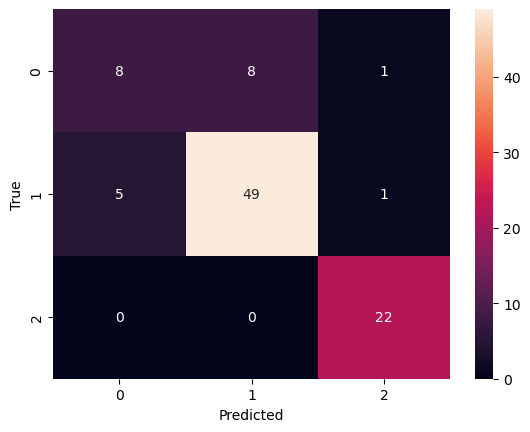

In [15]:
# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [16]:
# Evaluating the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8404255319148937


In [17]:
# Minimum importance threshold
min_importance = 0.001

# Getting feature importances
feature_importances = pipeline.named_steps['classifier'].feature_importances_


In [18]:
# Mapping feature importances to feature names
feature_names = X.columns
importance_dict = dict(zip(feature_names, feature_importances))



In [19]:
# Filtering features based on importance threshold
filtered_importance = {k: v for k, v in importance_dict.items() if v >= min_importance}


In [20]:
# Sorting filtered feature importances in descending order
sorted_importance = sorted(filtered_importance.items(), key=lambda x: x[1], reverse=True)

In [21]:
# Extracting feature names and importances
features = [item[0] for item in sorted_importance]
importances = [item[1] for item in sorted_importance]

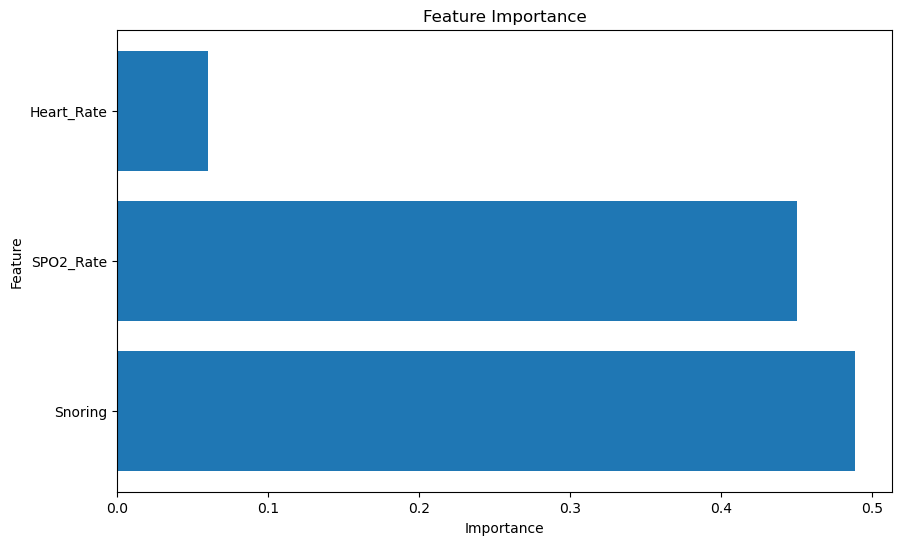

In [22]:
# Plotting
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()